In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [88]:
project_dir="results/projects/240117llama7b_10"
#project_dir="results/projects/240118llama7b_100"
#project_dir="results/projects/240117llama7b"


In [89]:
result_list=[]

def load_data(project_dir,prefix="test_"):
    for path in glob.glob(f"{project_dir}/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        generation=path.split("/")[-1].split("_")[1]
        generation=int(generation)

        mode=path.split("/")[-1].split("_")[0]
        d["generation"]=generation
        d["mode"]=mode

        #count self_reasoning data
        self_reasoning_records=0
        for gen in range(0,generation+1):
            self_reasoning_records+=len(glob.glob(f"{project_dir}/self_reasoning/{gen}_*.json"))

        d["Self-reasoning records"]=self_reasoning_records
        result_list.append(d)

    return result_list

#train_result_list=load_data(project_dir,"train_")
#test_result_list=load_data(project_dir,"test_")
result_list=load_data(project_dir,"")

In [90]:
result_df=pd.DataFrame(result_list)
result_df

,MSE,MAE,R2,Answer ratio,plot,generation,mode,Self-reasoning records
0,9453.70250,76.130,-0.100559,1.0,"[{'name': '1-benzyl-4-boc-piperazine', 'smiles...",1,train,23
1,8894.15245,73.103,-0.012953,1.0,"[{'name': 'Hexanoic acid', 'smiles': 'CCCCCC(=...",1,test,23
2,10071.47640,78.054,-0.040347,1.0,"[{'name': 'sulfamoxole', 'smiles': 'Cc2nc(NS(=...",0,train,11
3,8734.51245,76.423,0.005228,1.0,"[{'name': 'Hexanoic acid', 'smiles': 'CCCCCC(=...",0,test,11


<Axes: xlabel='generation', ylabel='MSE'>

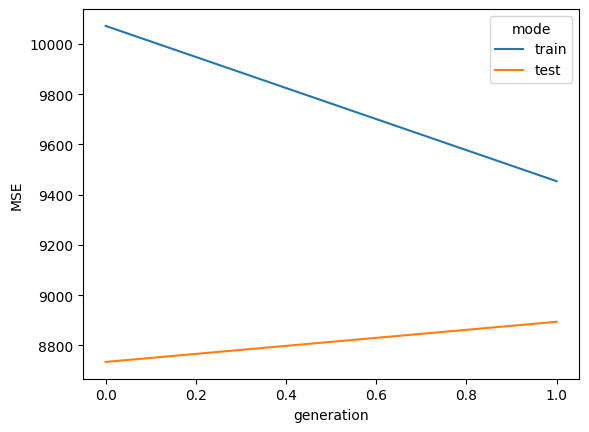

In [91]:
sns.lineplot(x="generation",y="MSE",hue="mode",data=result_df)

#plt.ylim(4000,12000)

<Axes: xlabel='Self-reasoning records', ylabel='MSE'>

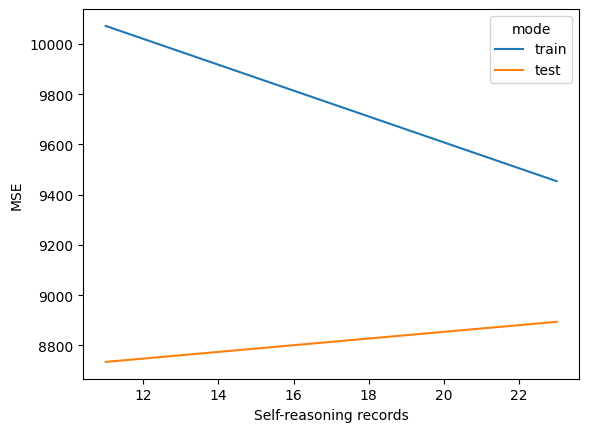

In [92]:

sns.lineplot(x="Self-reasoning records",y="MSE",hue="mode",data=result_df)